In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import numpy as np
import pandas as pd
import xlrd

In [3]:
def open_exl(address, idx):
    data = xlrd.open_workbook(address)
    table = data.sheets()[idx]
    rows = table.nrows
    ct_data = []
    for row in range(rows):
        ct_data.append(table.row_values(row))
    return np.array(ct_data)[:, :4]

def asfloat(data):
    new = np.zeros_like(data, dtype=np.float64)

    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            new[i, j] = my_float(data[i, j])

    return new

def my_float(x):
    try:
        return float(x)
    except:
        try:
            return float(x[:-1])           
        except:
            return float(x[:-2])

In [5]:
# load data from first 100 ranking in 5 servers
asia = open_exl('pubg_as.xls', 0)
eu = open_exl('pubg_eu.xls', 0)
na = open_exl('pubg_na.xls', 0)
oc = open_exl('pubg_oc.xls', 0)
sea = open_exl('pubg_sea.xls', 0)


# Load all data
all_data = np.genfromtxt('PUBG_Player_Statistics.csv', delimiter=',')
all_data[:, 28] = all_data[:, 28] * 100


# Train data
train_data = all_data[1:2000, :][:, [3, 2, 28, 9]]
test_data = all_data[2000:, :][:, [3, 2, 28, 9]]
players_data = train_data

In [6]:

data = np.vstack((asia[1:], eu[1:], na[1:], oc[1:], sea[1:], players_data[1:]))
df = pd.DataFrame({data[0, i]: data[1:, i] for i in range(data.shape[1])})
m = asfloat(data[1:, :4])

In [7]:
number_cluster = 6
kmeans = KMeans(n_clusters=number_cluster).fit(m)
labels = kmeans.labels_

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['#fffc4f', '#41f4eb', '#E44B4E', '#F461E6', '#61F464', '#8D77DD', '#f49e42']
label_list = ['Normal player', 'Hackers', 'Vetaran player', 'Both', 'God', 'Aimbot']
c_list = [colors[labels[i]] for i in range(m.shape[0])]
center = kmeans.cluster_centers_

plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Headshot Kill Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Rate')
plt.show()

NameError: name 'm' is not defined

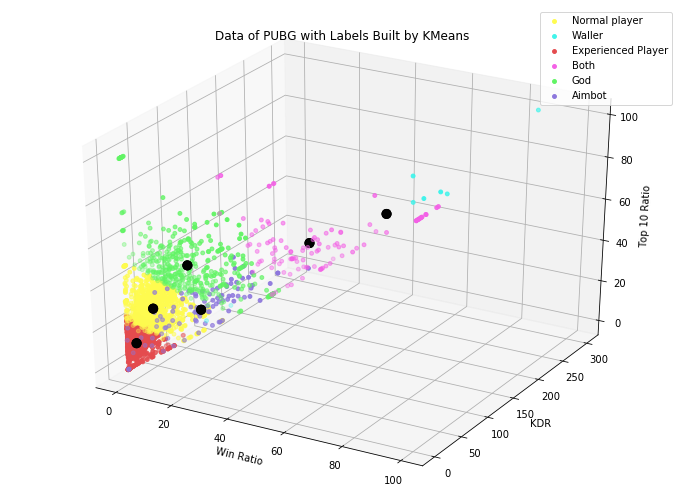

In [9]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = m[labels == i]
    x,y,z = c[:,0],c[:,1],c[:,3]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 3]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Data of PUBG with Labels Built by KMeans')
ax.set_zlabel('Top 10 Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Ratio')
plt.show()

In [10]:
predict_labels = kmeans.predict(test_data)

In [11]:
print(np.bincount(predict_labels))
print(predict_labels.shape)

[20526     1 59374   901  3911  1186]
(85899,)


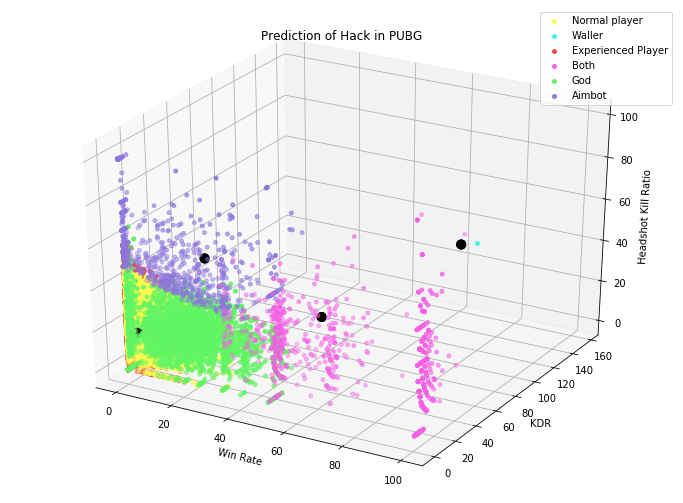

In [12]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = test_data[predict_labels == i]
    x,y,z = c[:,0],c[:,1],c[:,2]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 2]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Prediction of Hack in PUBG')
ax.set_zlabel('Headshot Kill Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Rate')
plt.show()

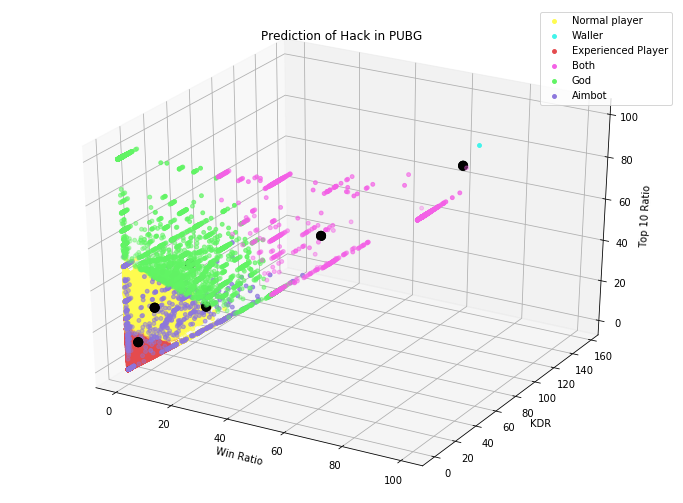

In [13]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111,projection='3d')

for i in range(number_cluster):
    c = test_data[predict_labels == i]
    x,y,z = c[:,0],c[:,1],c[:,3]
    x_c, y_c, z_c = center[:, 0], center[:, 1], center[:, 3]
    ax.scatter(x, y, z, s=15, color=colors[i], label=label_list[i])
    ax.scatter(x_c, y_c, z_c, s=80, alpha=0.5, c='black')

ax.legend()
ax.set_title('Prediction of Hack in PUBG')
ax.set_zlabel('Top 10 Ratio')
ax.set_ylabel('KDR')
ax.set_xlabel('Win Ratio')
plt.show()